In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load mnist dataset into pandas
mnist = pd.read_csv("mnist_train.csv")

In [3]:
# load top 5 samples of mnist dataset
print(mnist.head())


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
#seprating label or class or digit from dataset
label = mnist["label"]

In [5]:
data = mnist.drop("label", axis = 1)

In [6]:
data.shape

(42000, 784)

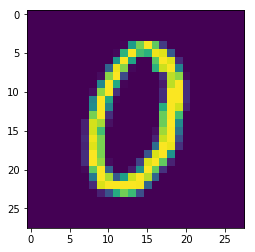

In [8]:
# display or plot a number
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (4, 4))
grid_data = data.loc[5].as_matrix().reshape(28, 28)
plt.imshow(grid_data)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler
stan_data = StandardScaler().fit_transform(data)

In [14]:
stan_data1 = pd.DataFrame(stan_data)

In [15]:
from sklearn import decomposition

In [16]:
pca = decomposition.PCA()


In [17]:
pca.n_components = 2
pca_data = pca.fit_transform(stan_data)

In [20]:
pca_data = np.vstack((pca_data.T, label)).T

         1st       2nd  label
0  -5.140491 -5.227109    1.0
1  19.292285  6.031604    0.0
2  -7.644509 -1.705776    1.0
3  -0.474212  5.835904    4.0
4  26.559545  6.023738    0.0


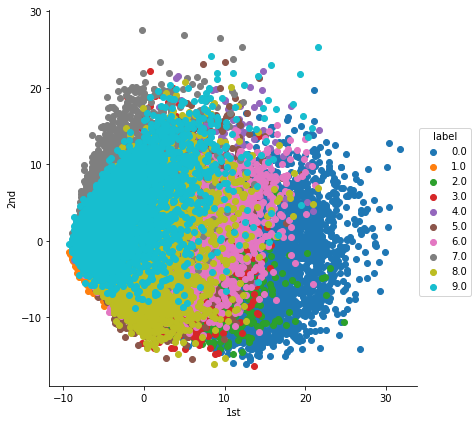

In [27]:
import seaborn as sns
pca_df = pd.DataFrame(data = pca_data, columns = ('1st', '2nd', 'label'))
print(pca_df.head())
sns.FacetGrid(pca_df, hue = 'label', size = 6) \
   .map(plt.scatter, '1st', '2nd') \
   .add_legend()
plt.show()

Conclusion:
    As we can see using 2 principle component we have plotted mnist dataset into 2 dimension
    but problem with this plot is it can not give better separabality using 2 principle
    component. we can not separate classes of 0,1,2 3,...9. using only visualizing 2 dimension.
    

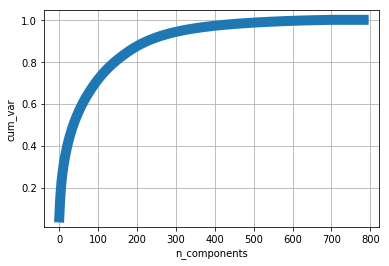

In [37]:
pca.n_components = 784
pca_data = pca.fit_transform(stan_data)
per_var = pca.explained_variance_/ np.sum(pca.explained_variance_)
cum_var = np.cumsum(per_var)
plt.figure(2, figsize = (6, 4))
plt.clf
plt.plot(cum_var, linewidth = 10)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cum_var')
plt.show()

Conclusion:
    In the above plot we can see that 400 dimension is giving close to 100 variance
    so concluding left 400 dimension is time wasteing and won't affect much to the model
    So when we will try to make a model based on 400 dimension and will get same accuracy
    as if conclude all dimension.